In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), "../", "scripts/analysis/autoencoders"))
import convolutional

In [2]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF
from PIL import Image
from pathlib import Path

In [3]:
model = convolutional.Autoencoder()
checkpoint = torch.load("../models/autoencoder.pt")
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [4]:
def preprocess(img):
    bg_color = (244,244,244)
    resize_to = (1024, 1024)
    height, width = img.size
    
    img = img.rotate(random.randint(0,180), fillcolor=bg_color)
    img_padded = Image.new(img.mode, (3000, 3000), bg_color)
    img_padded.paste(img, (1500-height//2, 1500-width//2))
    img_padded.thumbnail(resize_to, Image.ANTIALIAS)
    
    tsfms = transforms.Compose([
        transforms.Grayscale(),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
        transforms.ToTensor(),
    ])
    
    return tsfms(img_padded)

In [5]:
dataloader = DataLoader(
    convolutional.HistologyDataset("../intermediary/split_data/test", preprocess),
    batch_size=1
)

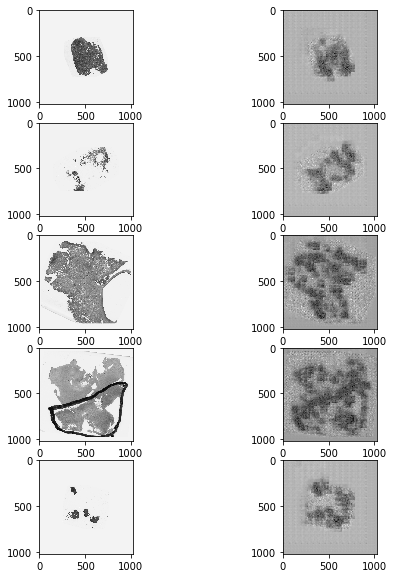

In [6]:
n_examples = 5
f, axes = plt.subplots(n_examples, 2, figsize=(8,10))
for i, (img, fp) in enumerate(itertools.islice(dataloader, n_examples)):
    with torch.no_grad():
        img_reconstructed, img_latent = model.forward(img)
    img = img[0,0,:,:]
    axes[i, 0].imshow(img, cmap="gray")
    img_reconstructed = img_reconstructed[0,0,:,:]
    axes[i, 1].imshow(img_reconstructed, cmap="gray")

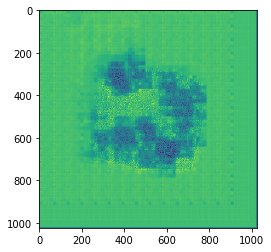

In [8]:
plt.imshow(img_reconstructed)